In [308]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from ydata_profiling import ProfileReport
import sweetviz as sv
import plotly.express as px


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [207]:
#Read in the csv file and convert to a Pandas dataframe
df = pd.read_csv('final_data.csv')

df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [208]:
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_notebook_iframe()


### Data Quality Checks and Data Cleaning:

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [209]:
df['position'].unique()


array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [210]:
#Unify the values in the position column based on the four categories: Goalkeeper, Defender, Midfield, Attack.
df.loc[df['position'] == 'Defender Centre-Back', 'position'] = 'Defender'
df.loc[df['position'] == 'Defender Left-Back', 'position'] = 'Defender'
df.loc[df['position'] == 'Defender Right-Back', 'position'] = 'Defender'
df.loc[df['position'] == 'midfield-DefensiveMidfield', 'position'] = 'Midfielder'
df.loc[df['position'] == 'midfield-CentralMidfield', 'position'] = 'Midfielder'
df.loc[df['position'] == 'midfield-AttackingMidfield', 'position'] = 'Midfielder'
df.loc[df['position'] == 'midfield-LeftMidfield', 'position'] = 'Midfielder'
df.loc[df['position'] == 'midfield-RightMidfield', 'position'] = 'Midfielder'
df.loc[df['position'] == 'Attack Centre-Forward', 'position'] = 'Attack'
df.loc[df['position'] == 'Attack-RightWinger', 'position'] = 'Attack'
df.loc[df['position'] == 'Attack-LeftWinger', 'position'] = 'Attack'
df.loc[df['position'] == 'Attack-SecondStriker', 'position'] = 'Attack'


In [211]:
df['position'].unique()

array(['Goalkeeper', 'Defender', 'Midfielder', 'Attack', 'midfield'],
      dtype=object)

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [212]:
#The available data is consistent with the objectives of the analysis.
#There are irrelevant columns to our objectives.

In [213]:
#drop irrelevant columns
df.drop(columns= 'player', inplace = True)
#df.drop(columns= 'winger', inplace = True)
df.drop(columns= 'position_encoded', inplace = True)

In [214]:
df.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,0
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,0
3,Manchester United,Lisandro Martínez,Defender,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,9,50000000,50000000,0
4,Manchester United,Raphaël Varane,Defender,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,21,40000000,80000000,0


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [215]:
# There are no duplicate valuse

In [216]:
df.duplicated().sum()

0

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [217]:
#Display number missing values per column
df.isnull().sum()

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
winger                 0
dtype: int64

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [218]:
# check columns types 
df.dtypes
# All good

team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
winger                   int64
dtype: object

In [219]:
#profile = ProfileReport(df_goalkeeper, title="Pandas Profiling Report")
#profile.to_notebook_iframe()

In [220]:
#create new dataframe for goalkeeper info
df_goalkeeper = df[df['position'] == 'Goalkeeper'].copy()
df_goalkeeper.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
0,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,13,15000000,70000000,0
1,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000,0
2,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.0,0.0,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,4,600000,6000000,0
32,West Ham United,Alphonse Areola,Goalkeeper,195.0,30.0,41,0.0,0.0,0.000000,0.0,0.0,0.898502,0.449251,3606,34,4,16,8000000,17500000,0
33,West Ham United,Lukasz Fabianski,Goalkeeper,190.0,38.0,75,0.0,0.0,0.040767,0.0,0.0,1.331723,0.271780,6623,554,99,4,1000000,9000000,0


In [221]:
#drop column
df_goalkeeper.drop(columns='goals', inplace = True)
df_goalkeeper.drop(columns='assists', inplace = True)
df_goalkeeper.drop(columns='position', inplace = True)
df_goalkeeper.drop(columns='winger', inplace = True)

In [222]:
#create new dataframe without goalkeeper info
df_copy = df[df['position'] != 'Goalkeeper'].copy()
df_copy.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,winger
3,Manchester United,Lisandro Martínez,Defender,175.0,25.0,82,0.028090,0.056180,0.224719,0.0000,0.0,0.0,0.0,6408,175,22,9,50000000,50000000,0
4,Manchester United,Raphaël Varane,Defender,191.0,30.0,63,0.017889,0.017889,0.053667,0.0000,0.0,0.0,0.0,5031,238,51,21,40000000,80000000,0
5,Manchester United,Harry Maguire,Defender,194.0,30.0,68,0.037799,0.000000,0.302394,0.0189,0.0,0.0,0.0,4762,148,27,1,25000000,70000000,0
6,Manchester United,Victor Lindelöf,Defender,187.0,28.0,70,0.000000,0.032901,0.115153,0.0000,0.0,0.0,0.0,5471,95,19,10,15000000,35000000,0
7,Manchester United,Phil Jones,Defender,185.0,31.0,8,0.000000,0.000000,0.216346,0.0000,0.0,0.0,0.0,416,932,169,7,2000000,20000000,0


In [291]:
#drop column
df_copy.drop(columns='goals conceded', inplace = True)
df_copy.drop(columns='clean sheets', inplace = True)

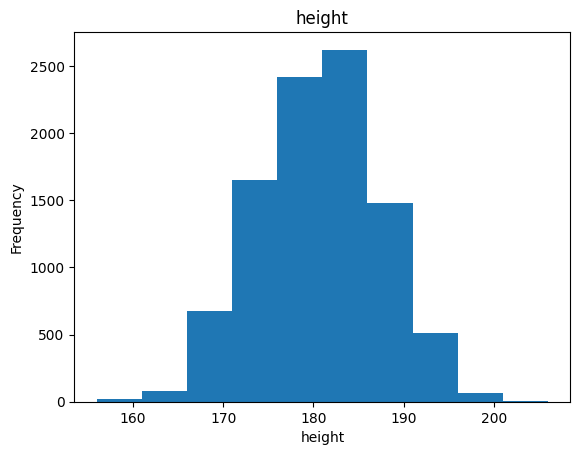

In [224]:
plt.hist(df_copy['height'])
plt.title('height')
plt.xlabel('height')
plt.ylabel('Frequency')
plt.show()

#all good

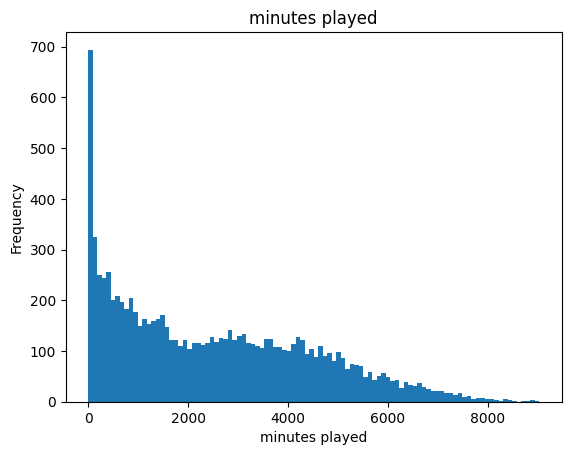

In [225]:
plt.hist(df_copy["minutes played"] ,bins=100)
plt.title('minutes played')
plt.xlabel('minutes played')
plt.ylabel('Frequency')
plt.show()

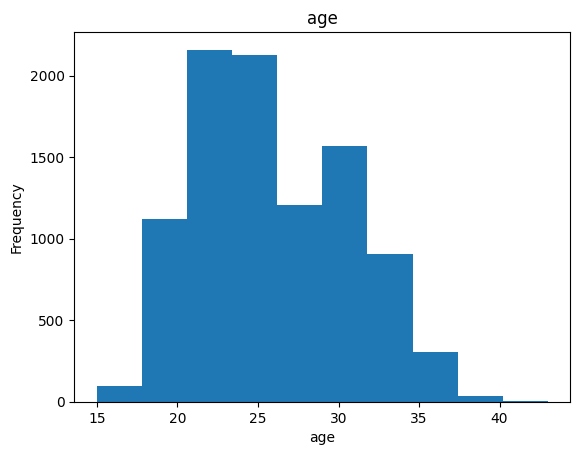

In [226]:
plt.hist(df_copy['age'])
plt.title('age')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()


In [227]:
df_copy = df_copy[(df_copy["age"] >= 18) & (df_copy["age"] <= 40)]

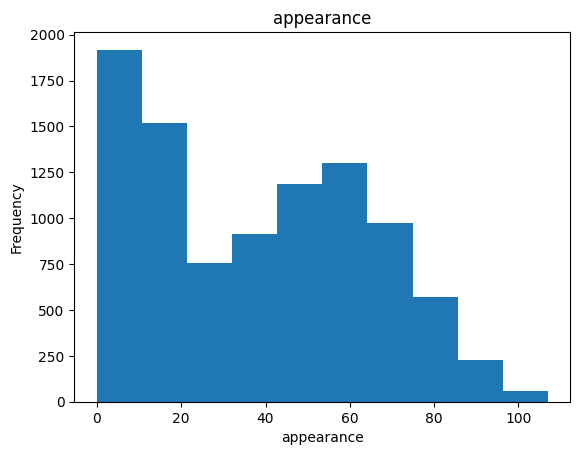

In [228]:
plt.hist(df_copy['appearance'])
plt.title('appearance')
plt.xlabel('appearance')
plt.ylabel('Frequency')
plt.show()
#all good

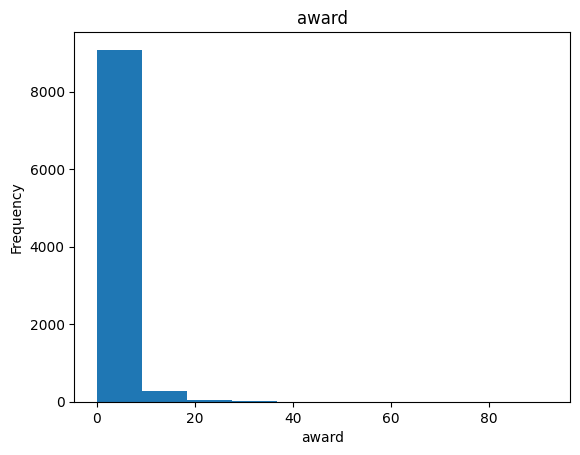

In [229]:
plt.hist(df_copy['award'])
plt.title('award')
plt.xlabel('award')
plt.ylabel('Frequency')
plt.show()


In [230]:
df_copy = df_copy[df_copy["award"] <= 30]

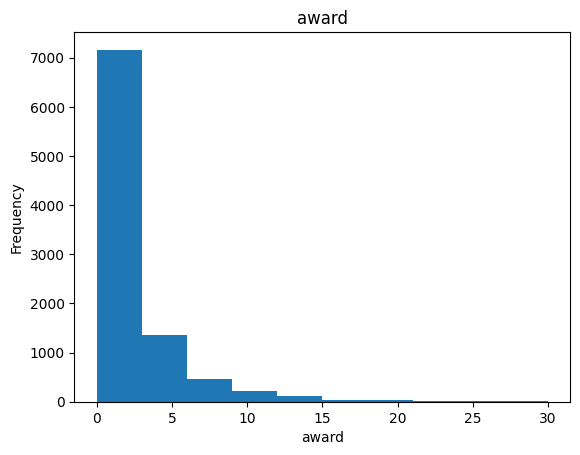

In [231]:
plt.hist(df_copy['award'])
plt.title('award')
plt.xlabel('award')
plt.ylabel('Frequency')
plt.show()


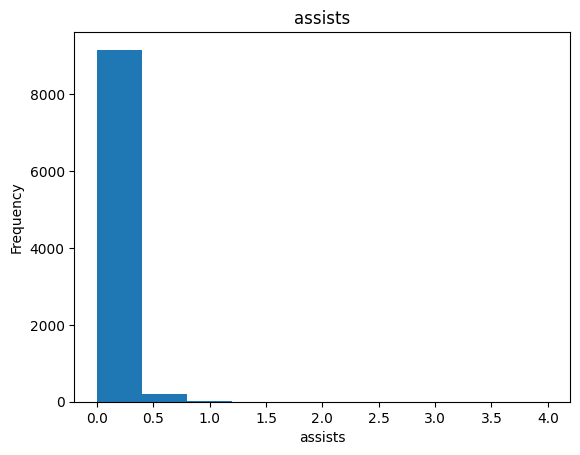

In [232]:
plt.hist(df_copy['assists'])
plt.title('assists')
plt.xlabel('assists')
plt.ylabel('Frequency')
plt.show()


In [233]:
df_copy['assists'].value_counts()

assists
0.000000    3249
0.200000       6
0.100784       6
1.000000       6
0.111111       6
            ... 
0.171647       1
0.144138       1
0.242152       1
0.283514       1
0.208333       1
Name: count, Length: 5028, dtype: int64

In [234]:
df_copy = df_copy[df_copy["assists"] <= 1.5]


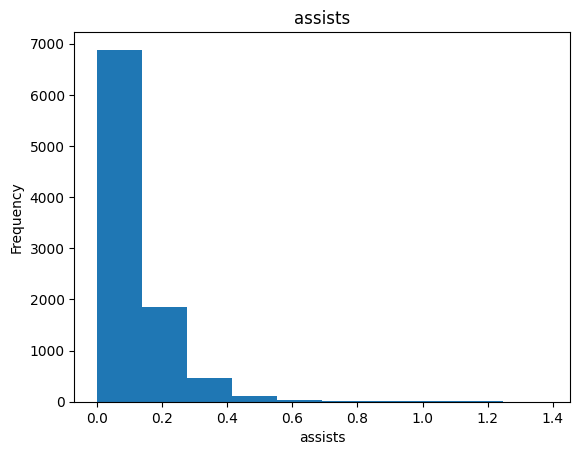

In [235]:
plt.hist(df_copy['assists'])
plt.title('assists')
plt.xlabel('assists')
plt.ylabel('Frequency')
plt.show()


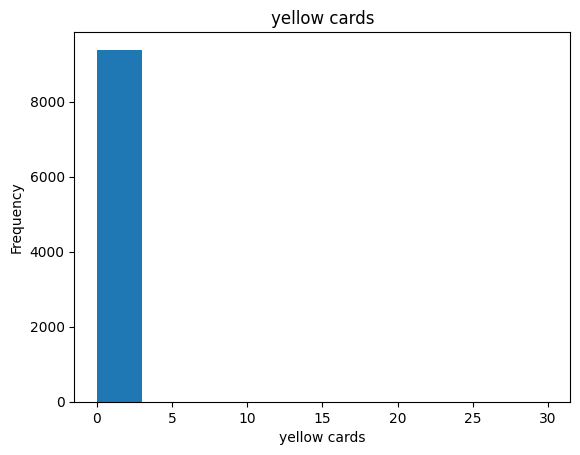

In [236]:
plt.hist(df_copy['yellow cards'])
plt.title('yellow cards')
plt.xlabel('yellow cards')
plt.ylabel('Frequency')
plt.show()


In [237]:
df_copy = df_copy[df_copy["yellow cards"] <= 3]


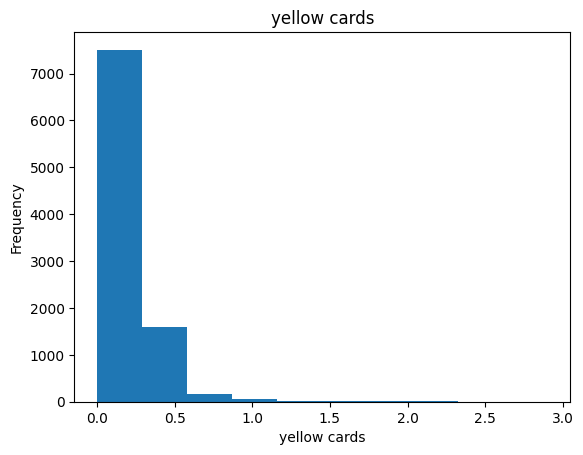

In [238]:
plt.hist(df_copy['yellow cards'])
plt.title('yellow cards')
plt.xlabel('yellow cards')
plt.ylabel('Frequency')
plt.show()


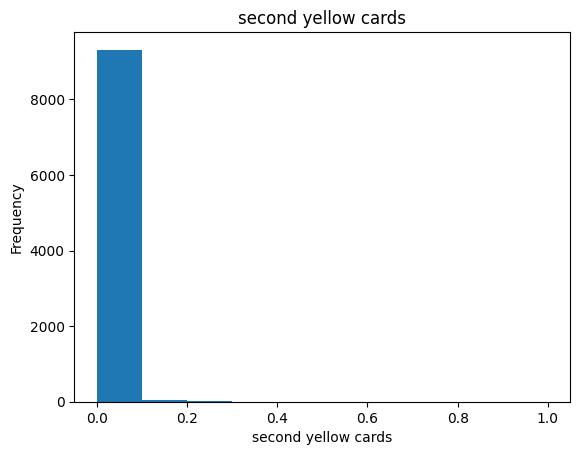

In [239]:
plt.hist(df_copy['second yellow cards'])
plt.title('second yellow cards')
plt.xlabel('second yellow cards')
plt.ylabel('Frequency')
plt.show()



In [240]:
df_copy = df_copy[df_copy["second yellow cards"] <= 0.2]


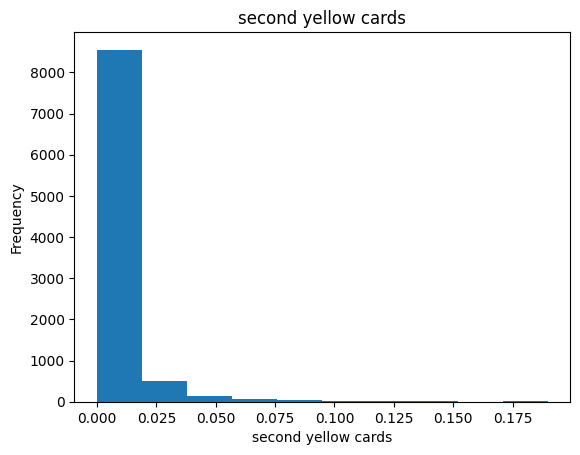

In [241]:
plt.hist(df_copy['second yellow cards'])
plt.title('second yellow cards')
plt.xlabel('second yellow cards')
plt.ylabel('Frequency')
plt.show()


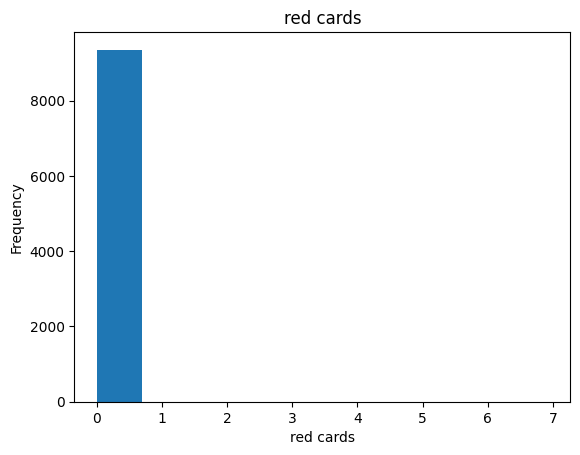

In [242]:
plt.hist(df_copy['red cards'])
plt.title('red cards')
plt.xlabel('red cards')
plt.ylabel('Frequency')
plt.show()

In [243]:
df_copy = df_copy[df_copy["red cards"] <= 0.2]


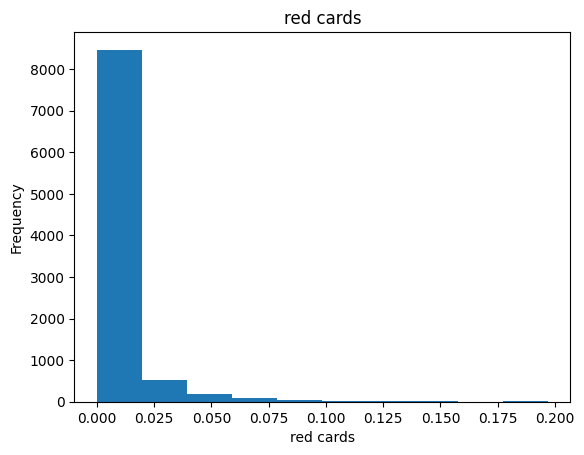

In [244]:
plt.hist(df_copy['red cards'])
plt.title('red cards')
plt.xlabel('red cards')
plt.ylabel('Frequency')
plt.show()

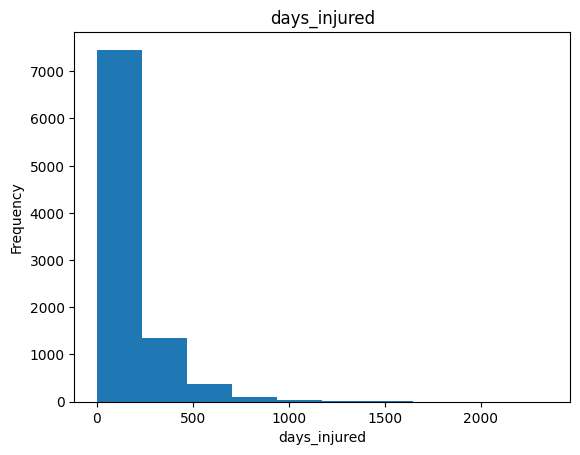

In [245]:
plt.hist(df_copy['days_injured'])
plt.title('days_injured')
plt.xlabel('days_injured')
plt.ylabel('Frequency')
plt.show()

In [246]:
df_copy = df_copy[df_copy["days_injured"] <= 600]


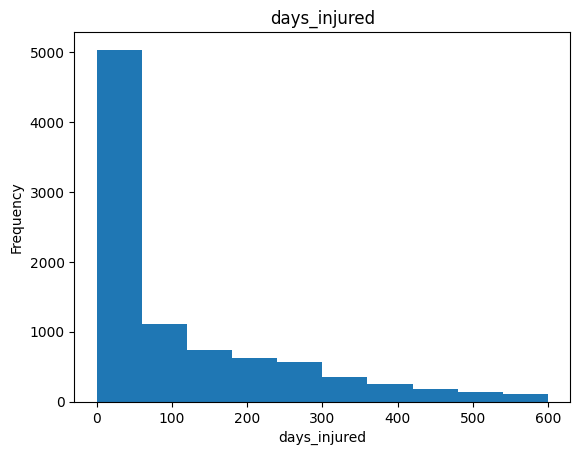

In [247]:
plt.hist(df_copy['days_injured'])
plt.title('days_injured')
plt.xlabel('days_injured')
plt.ylabel('Frequency')
plt.show()

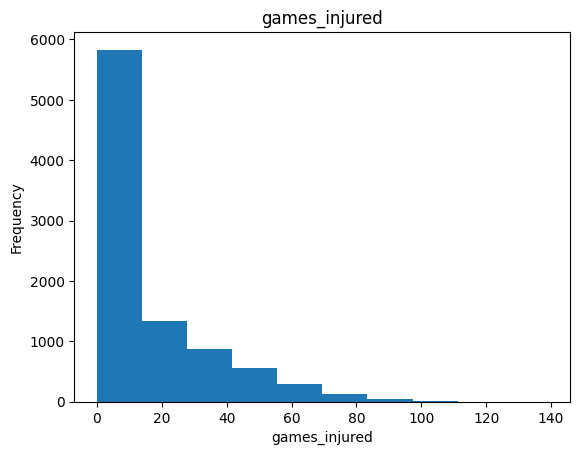

In [248]:
plt.hist(df_copy['games_injured'])
plt.title('games_injured')
plt.xlabel('games_injured')
plt.ylabel('Frequency')
plt.show()

In [249]:
df_copy = df_copy[df_copy["days_injured"] <= 20]

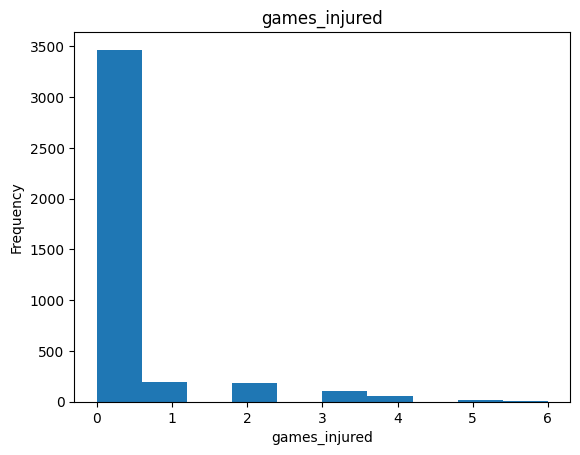

In [250]:
plt.hist(df_copy['games_injured'])
plt.title('games_injured')
plt.xlabel('games_injured')
plt.ylabel('Frequency')
plt.show()

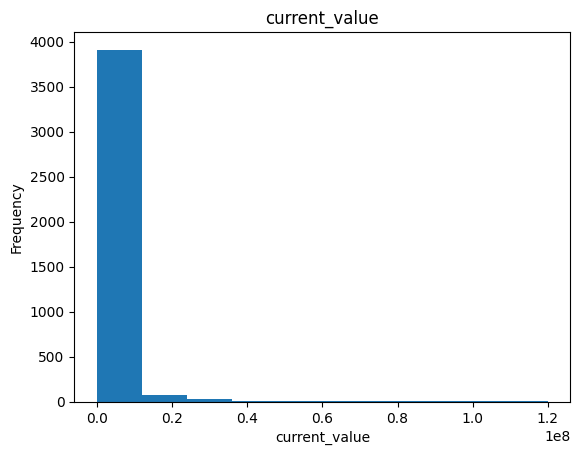

In [251]:
plt.hist(df_copy['current_value'])
plt.title('current_value')
plt.xlabel('current_value')
plt.ylabel('Frequency')
plt.show()

In [254]:
df_copy = df_copy[(df_copy["current_value"] <= 10000000) & (df_copy["current_value"] > 0)]



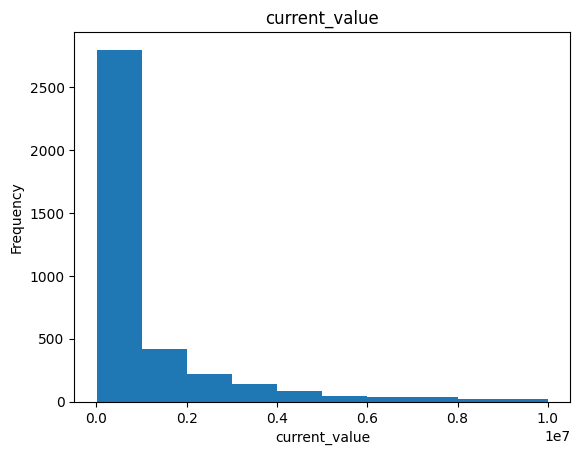

In [255]:
plt.hist(df_copy['current_value'])
plt.title('current_value')
plt.xlabel('current_value')
plt.ylabel('Frequency')
plt.show()

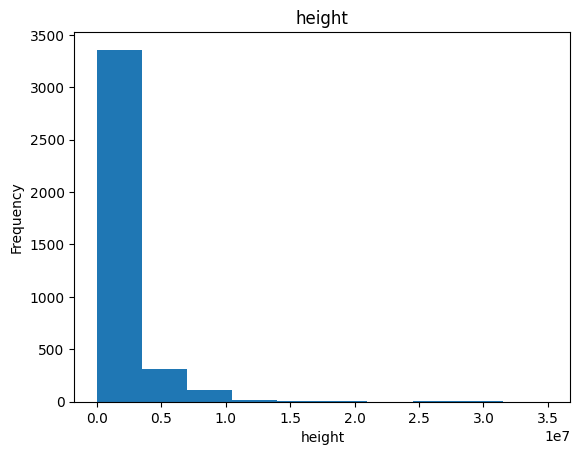

In [257]:
plt.hist(df_copy['highest_value'])
plt.title('height')
plt.xlabel('height')
plt.ylabel('Frequency')
plt.show()



In [260]:
# I think it is impossible to have 0 in "highest_value" 
df_copy = df_copy[(df_copy["highest_value"] > 0 ) & (df_copy["highest_value"] < 3300000)]


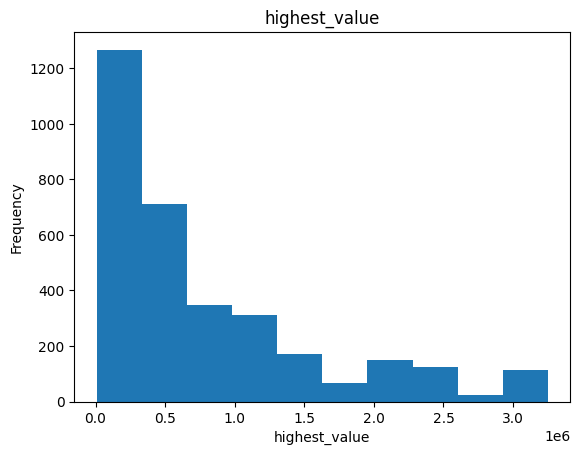

In [261]:
plt.hist(df_copy['highest_value'])
plt.title('highest_value')
plt.xlabel('highest_value')
plt.ylabel('Frequency')
plt.show()



In [264]:
df_copy.to_csv('copy.csv')

In [275]:
df_copy.head(1)

,name,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,...,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor,position_Attack,position_Defender,position_Goalkeeper,position_Midfielder,position_midfield
0,David de Gea,189.0,32.0,104,0.0,0.0,0.009585,0.0,0.0,1.217252,...,False,False,False,False,False,False,False,True,False,False


In [269]:
categorical_features = ['team', 'position']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
                     'minutes played', 'days_injured', 'games_injured', 'award','highest_value' ,'winger']

In [273]:
df_copy.shape

(10754, 397)

In [290]:
df_copy.head()

,name,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,...,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor,position_Attack,position_Defender,position_Goalkeeper,position_Midfielder,position_midfield
0,David de Gea,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,...,False,False,False,False,False,False,False,True,False,False
1,Jack Butland,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,...,False,False,False,False,False,False,False,True,False,False
2,Tom Heaton,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,...,False,False,False,False,False,False,False,True,False,False
3,Lisandro Martínez,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,...,False,False,False,False,False,False,True,False,False,False
4,Raphaël Varane,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,...,False,False,False,False,False,False,True,False,False,False


In [272]:
# one hot coding
df_copy = pd.get_dummies(df, columns=categorical_features)

In [292]:
df_num= df_copy.select_dtypes(include=['number'])

correlation = df_num.corr()


In [294]:
fig = px.imshow(correlation, text_auto=True, color_continuous_scale='Viridis')
fig.update_layout(
    width=800,  
    height=600,  
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickvals=list(correlation.columns), ticktext=list(correlation.columns)),
    yaxis=dict(tickvals=list(correlation.columns), ticktext=list(correlation.columns))
)

In [ ]:
categorical_features = ['team', 'position']
numeric_features = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
                      'days_injured', 'games_injured', 'highest_value']

In [314]:
df_copy.head()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,days_injured,games_injured,...,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor,position_Attack,position_Defender,position_Goalkeeper,position_Midfielder,position_midfield
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,42,5,...,False,False,False,False,False,False,False,True,False,False
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,510,58,...,False,False,False,False,False,False,False,True,False,False
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,697,84,...,False,False,False,False,False,False,False,True,False,False
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,175,22,...,False,False,False,False,False,False,True,False,False,False
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,238,51,...,False,False,False,False,False,False,True,False,False,False


In [299]:
#df_copy.drop(columns='name', inplace=True)
df_copy.drop(columns='award', inplace=True)
df_copy.drop(columns='minutes played', inplace=True)
df_copy.drop(columns='winger', inplace=True)

In [300]:
correlation = df_copy.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value                1.000000
highest_value                0.834553
appearance                   0.419656
team_Manchester City         0.208932
team_Bayern Munich           0.180172
                               ...   
team_Daejeon Hana Citizen   -0.024307
position_Defender           -0.024965
position_midfield           -0.032972
age                         -0.050156
position_Goalkeeper         -0.077891
Name: current_value, Length: 391, dtype: float64


In [304]:
# Set the correlation threshold
threshold = 0.2  # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'current_value', 'highest_value', 'team_Manchester City'], dtype='object')

In [305]:
selected_features = ['appearance', 'current_value', 'highest_value', 'team_Manchester City']

In [326]:
df_copy = df_copy[selected_features]
df_copy.head()

,appearance,current_value,highest_value,team_Manchester City
0,104,15000000,70000000,False
1,15,1500000,22000000,False
2,4,600000,6000000,False
3,82,50000000,50000000,False
4,63,40000000,80000000,False


In [327]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Prepare data
X = df_copy.drop(['current_value'], axis=1)
y = df_copy['current_value']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=42)

#sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [328]:
X.shape

(10754, 3)

In [329]:
model = LinearRegression()

In [330]:
# Fit the model on the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [331]:
# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)

In [332]:
model.coef_

array([ 820392.08478622, 7033154.74562796,  550937.39422145])

In [333]:
coeff_df = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,8.203921e+05
highest_value,7.033155e+06
team_Manchester City,5.509374e+05


In [334]:
print(model.intercept_) 

3622354.992444496


In [338]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)

Lasso()

In [339]:

coeff_df = pd.DataFrame(lasso_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
appearance,3.089461e+04
highest_value,5.268568e-01
team_Manchester City,1.173581e+07


In [340]:
r2_score_train = r2_score(y_train, model.predict(X_train_scaled))
r2_score_test = r2_score(y_test, y_pred)
print(f'R Square for training: {r2_score_train}')
print(f'R Square for testing: {r2_score_test}')

R Square for training: 0.7007334013218037
R Square for testing: 0.7210254214017041


In [342]:
predictions = model.predict(X_test_scaled)
#predictions

In [343]:
Real_Values = np.array(y_test)
#Real_Values

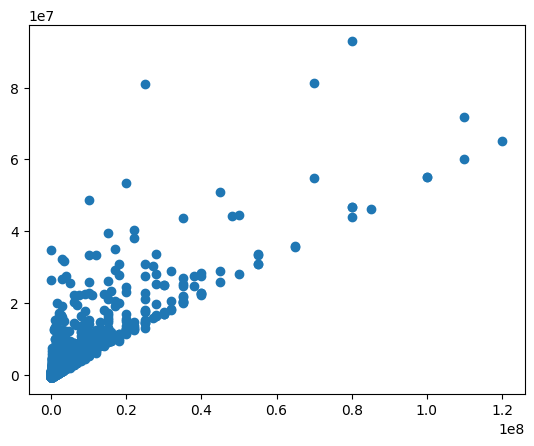

In [344]:
plt.scatter(Real_Values,predictions); 

C:\Users\Dani_\AppData\Local\Temp\ipykernel_15388\3949530067.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




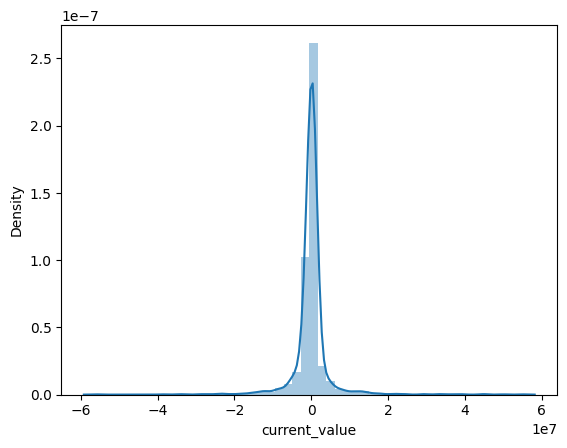

In [345]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution

In [ ]:
plt.hist(df_copy['height'])
plt.title('height')
plt.xlabel('height')
plt.ylabel('Frequency')
plt.show()

In [ ]:
plt.hist(df_copy['height'])
plt.title('height')
plt.xlabel('height')
plt.ylabel('Frequency')
plt.show()

In [ ]:
df['position'].unique()


array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [64]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9525 entries, 3 to 10753
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 9525 non-null   object 
 1   name                 9525 non-null   object 
 2   position             9525 non-null   object 
 3   height               9525 non-null   float64
 4   age                  9525 non-null   float64
 5   appearance           9525 non-null   int64  
 6   goals                9525 non-null   float64
 7   assists              9525 non-null   float64
 8   yellow cards         9525 non-null   float64
 9   second yellow cards  9525 non-null   float64
 10  red cards            9525 non-null   float64
 11  minutes played       9525 non-null   int64  
 12  days_injured         9525 non-null   int64  
 13  games_injured        9525 non-null   int64  
 14  award                9525 non-null   int64  
 15  current_value        9525 non-null   int64

In [ ]:
plt.hist(df['height'])
plt.title('height')
plt.xlabel('height')
plt.ylabel('Frequency')
plt.show()

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.